D208: Predictive Modeling
=========================
**Scott Sullivan | 010547531**
**June 9, 2023**

## Task 1

## Part I: Research Question

### A1: Summary Questions
What factors influence high bandwidth (as described by the attribute “Bandwidth_GB_Year”) used by customers during a year? The author proposes to find the factors (if any), in the dataset that could potentially have an impact on bandwidth (and by extension, the health and profitability of the network).

### A2: Define Goals
The first goal of this analysis is to understand customer behavior, specifically, factors that influence their bandwidth consumption. Through this, the author will better understand the customer base and usage patterns. These insights will be able to be used to develop more effective marketing strategies to increase customer satisfaction and retention.

Also, through the understanding of which factors influence 'Bandwidth_GB_Year', we can improve our product to better meet customer needs. For example, if certain attributes or behaviors correlate with higher bandwidth, the company could potentially develop new products or modify existing products or service bundles that would be aimed at this customer segment and increase revenue.


## Part II: Method Justification

### B1: Four assumptions regarding multiple linear regression models
Below are multiple assumptions the author is making in regards to the multiple linear regression model.
1. **Linear Relationship**: Our variables of interest must be shown to have a linear relationship. This will be verified with a scatterplot.

2. **Target Variable is Continuous**: We must ensure that the dependent variable (our y-axis) is continuous.

3. **Multiple independent variables**: While the dependent variable must be continuous, the independent variables may be continuous or categorical means, but we must have multiple (2+) variables.

4. **Independence**: Our fourth assumption is to assume that the observations are independent of each other.
   

### B2: Python Benefits Regarding This Analysis
1. Python (via Jupyter Notebooks) has a broad range of libraries and frameworks that can be utilized by the author to analyze large datasets. Additionally, it is cross-platform, thereby allowing the code to be run on multiple platforms.

2. Python is also very powerful in visualization of datasets. Prior to analyzing and during the analysis, it will be beneficial to get a better view of the data, and Python allows us to graph and visualize our datasets to better extract information.

### B3: What makes multiple linear regression appropriate for this technique
The author believes that making use of multiple linear regression will be appropriate for a number of reasons. Primarily, the dependent variable being used for this analysis (bandwidth) is continuous, which is a key requirement for this model. 

Additionally, multiple linear regression excels because while it will identify the independent and dependent variable relationships, it is also capable of quantifying the relationships. As a result, the author will be able to determine the predicted change in 'Bandwidth_GB_Year' as a direct result of a change in one of the independent variables while maintaining the other variables constant. This can be useful when planning and quantifying potential courses of actions.

## Part III: Preparation of Data

### C1: Data cleaning goals & steps to clean data (includes annotated code)
The author plans to clean the data by searching for Null values (using Pandas), outliers (using histograms), removing unnecessary data attributes, converting categorical values (such as yes or no) into numerical values (1 or 0 respectively) and finally relabeling attributes to be more descriptive.

Initial examination shows 10,000 records and 50 attributes. The code to import the data and show the initial attributes are as follows. One note, for the first import, the author discovered that one of the three categorical values for Internet Services was "None" (meaning the customer had no internet service). As a result, during the import, pandas incorrectly classified it as a Null value. To correct this, the author excluded "None" as a possible value to trigger the NaN flag.

In [1]:
import numpy as np
import pandas as pd

# Read the CSV
na_values = ['NaN', 'nan', '']
csvfile = '_data/churn_clean.csv'
df = pd.read_csv(csvfile, keep_default_na=False, na_values=na_values)

# df = pd.read_csv('_data/churn_clean.csv')

# Copy the dataframe to RAW in case we need to come back to the raw data
df_raw = df
df.head(2)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4


#### Duplicates
We now examine the dataframe for duplicates:

In [2]:
num_duplicates = len(df) - len(df.duplicated())
print(f"Duplicates: {num_duplicates} of {len(df)} records.\n")

Duplicates: 0 of 10000 records.



#### Nulls
And now we use missingno to check for nulls.

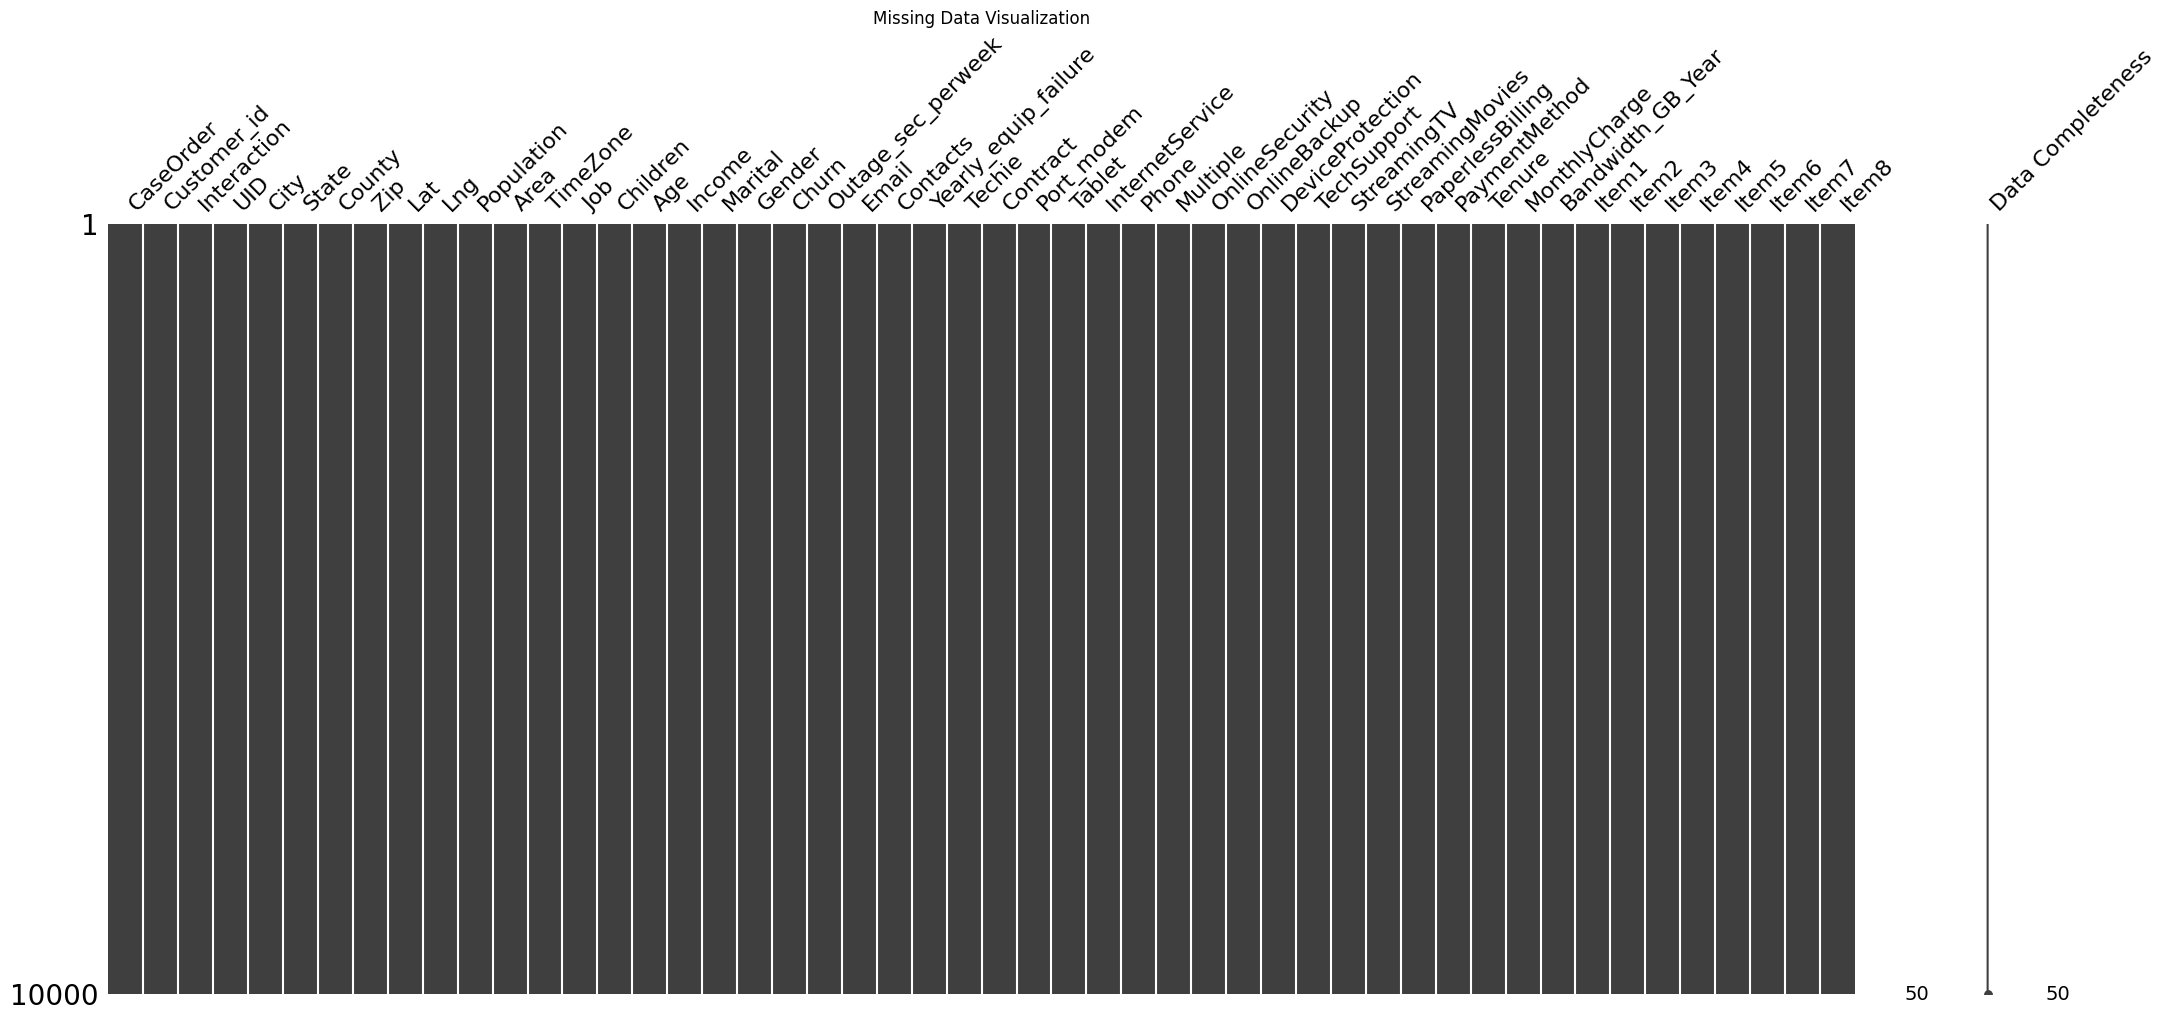

In [3]:
import missingno as msno
%matplotlib inline
import matplotlib.pyplot as plt
msno.matrix(df.sample(10000), labels=True)
plt.title('Missing Data Visualization')
plt.show()

As mentioned in the initial part of this document, the author had to import the CSV file using a special import which excluded "None" from appearing as a Null value. Initially, it appeared as if there were a significant number of null values for this attribute, but upon closer examplination, the realization was apparent that the value was, in fact, a third categorical option of "None."


In [4]:
# Verify there are no null values
df.isnull().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

#### Outliers
The author now looked at the outliers by printing a boxplot of the appropriate variables.

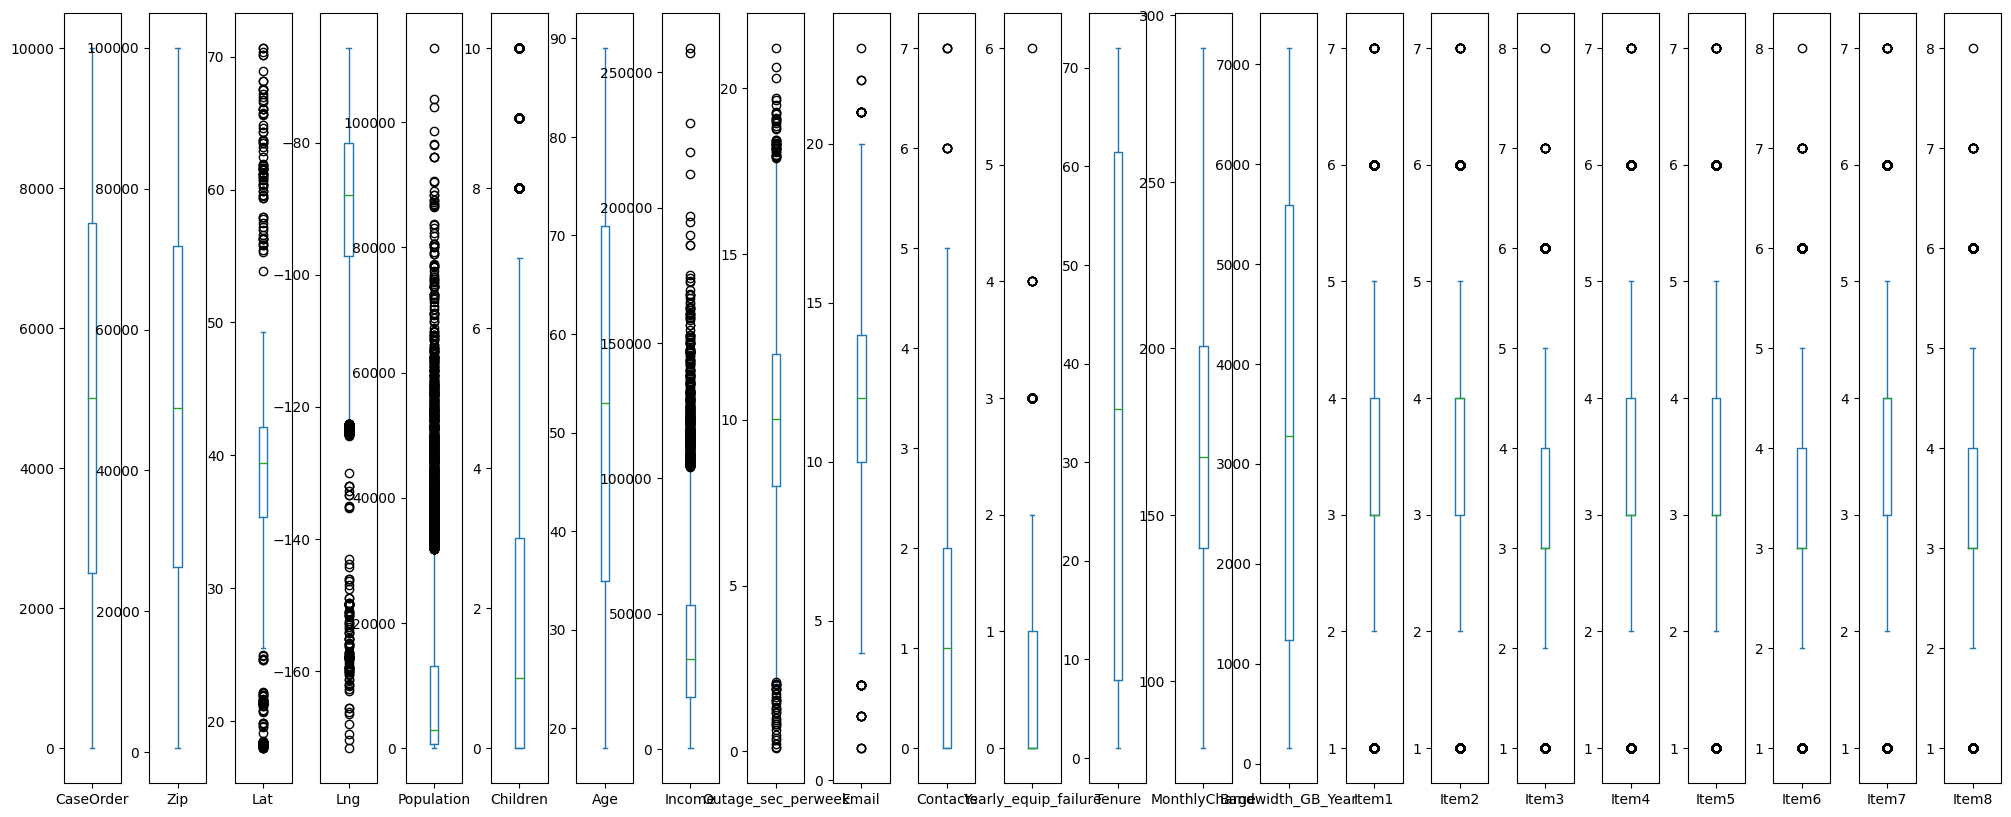

In [6]:
# Plot boxplot for each attribute. 
# NOTE: this code was previously written and used by the author for an earlier class, D206
import plotnine as p9

df.plot(
    kind='box',
    subplots=True,
    sharey=False,
    figsize=(25, 10)
)
# increase spacing between subplots
plt.subplots_adjust(wspace=0.5)
plt.show()

Regarding the outliers, the author found that although there were several attributes that may have outliers. That said, on a closer look, only "Children" and "Outages per week" had what were actual outliers. The former outlier included customers with 7-10 children. Outliers for the latter showed a cluster of outliers between 35 and 45 outages per week.

Therefore, the author decided to keep the outlier data since it was likely that either one or both may play a role in finding insights with our bandwidth analysis.

#### One Hot Encoding
For the attributes that were not a simple boolean Yes/No, the author performed a One Hot Encoding to each of the attributes, such as Gender, to quantify the values. These newly encoded columns were added to the dataframe and the originals dropped.

In [7]:
# One Hot Encoding
one_hot_attr = ['Gender', 'Contract', 'InternetService', 'PaymentMethod']

for attr in one_hot_attr:
    if attr in df.columns:
        # Added 'drop_first=True' at end of parameters to drop one column to avoid multicoliniarity
        # Also added astype to convert from boolean to numerical
        y = pd.get_dummies(df[attr], prefix=attr, drop_first=True)
        df.drop(attr, axis=1, inplace=True)
        print(f"Dropped: {attr}\t")
        df = pd.concat([df, y], axis="columns")

print(df.head(2))
df.dtypes

Dropped: Gender	
Dropped: Contract	
Dropped: InternetService	
Dropped: PaymentMethod	
   CaseOrder Customer_id                           Interaction  \
0          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   

                                UID         City State                 County  \
0  e885b299883d4f9fb18e39c75155d990  Point Baker    AK  Prince of Wales-Hyder   
1  f2de8bef964785f41a2959829830fb8a  West Branch    MI                 Ogemaw   

     Zip       Lat        Lng  ...  Item8 Gender_Male Gender_Nonbinary  \
0  99927  56.25100 -133.37571  ...      4        True            False   
1  48661  44.32893  -84.24080  ...      4       False            False   

  Contract_One year  Contract_Two Year  InternetService_Fiber Optic  \
0              True              False                         True   
1             False              False                         True   

   InternetService_None PaymentMet

CaseOrder                                  int64
Customer_id                               object
Interaction                               object
UID                                       object
City                                      object
State                                     object
County                                    object
Zip                                        int64
Lat                                      float64
Lng                                      float64
Population                                 int64
Area                                      object
TimeZone                                  object
Job                                       object
Children                                   int64
Age                                        int64
Income                                   float64
Marital                                   object
Churn                                     object
Outage_sec_perweek                       float64
Email               

#### YES / NO and Boolean attributes:
For each of the attributes with a Yes or No value, the author wrote the following python code to replace each string with the respective integer value with No being replaced with 0, and Yes being replaced with 1. Additionally, the attributes that are NOT pertaining to any correlation will be dropped. These include attributes such as Customer_ID, Interaction, UID, etc.

#### Item1-8 Renaming
Items1-8 have also been renamed here for more user-friendly analysis. The replacement names are pulled from the data dictionary provided by the instructor.

In [8]:
attr_to_change = ['Techie', 'Churn', 'Port_modem', 'Phone','Tablet','Multiple','OnlineSecurity', 'DeviceProtection',
                        'OnlineBackup','StreamingTV','TechSupport', 'StreamingMovies', 'PaperlessBilling']
attr_to_rename = {'Item1':'Timely_Response', 'Item2':'Timely_Fixes','Item3':'Timely_Replacements','Item4':'Reliability','Item5':'Options',
                        'Item6':'Respectful','Item7':'Courteous','Item8':'Active_Listening'}
attr_to_drop = ['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'Population', 'City', 'State', 'County', 
                      'Zip', 'Lat', 'Lng', 'Marital', 'Area', 'TimeZone', 'Job']

for a in attr_to_change:
    print(f"Updating: {a}\t")
    df[a] = df[a].replace({"Yes": 1, "No": 0, "True": 1, "False": 0})
    df[a] = df[a].astype(np.int64)  # Ensure data is saved as a 1 and 0 int, not a boolean "true"/"false"


for a in attr_to_drop:
    if a in df.columns:  # if the attribute column exists error checking
        df.drop(a, axis=1, inplace=True)
        print(f"Dropped: {a}\t")

df = df.rename(columns=attr_to_rename)

df.head(5)

Updating: Techie	
Updating: Churn	
Updating: Port_modem	
Updating: Phone	
Updating: Tablet	
Updating: Multiple	
Updating: OnlineSecurity	
Updating: DeviceProtection	
Updating: OnlineBackup	
Updating: StreamingTV	
Updating: TechSupport	
Updating: StreamingMovies	
Updating: PaperlessBilling	
Dropped: CaseOrder	
Dropped: Customer_id	
Dropped: Interaction	
Dropped: UID	
Dropped: Population	
Dropped: City	
Dropped: State	
Dropped: County	
Dropped: Zip	
Dropped: Lat	
Dropped: Lng	
Dropped: Marital	
Dropped: Area	
Dropped: TimeZone	
Dropped: Job	


,Children,Age,Income,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Port_modem,...,Active_Listening,Gender_Male,Gender_Nonbinary,Contract_One year,Contract_Two Year,InternetService_Fiber Optic,InternetService_None,PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check
0,0,68,28561.99,0,7.978323,10,0,1,0,1,...,4,True,False,True,False,True,False,True,False,False
1,1,27,21704.77,1,11.699080,12,0,1,1,0,...,4,False,False,False,False,True,False,False,False,False
2,4,50,9609.57,0,10.752800,9,0,1,1,1,...,3,False,False,False,True,False,False,True,False,False
3,1,48,18925.23,0,14.913540,15,2,0,1,0,...,3,True,False,False,True,False,False,False,False,True
4,0,83,40074.19,1,8.147417,16,2,1,0,1,...,5,True,False,False,False,True,False,False,False,True


#### Print sample row to verify values for each column have been updated

In [9]:
column_names = df.columns
dtypes = df.dtypes
first_row = df.iloc[1].values

column_names = df.columns
dtypes = df.dtypes
first_row = df.iloc[1].values
print(f"\033[1mName\t\tType\tValue\033[0m")
for column_name, dtype, value in zip(column_names, dtypes, first_row):
    print(f"{column_name:<15}\t{dtype}\t{value:<18}\n")    

Name		Type	Value
Children       	int64	1                 

Age            	int64	27                

Income         	float64	21704.77          

Churn          	int64	1                 

Outage_sec_perweek	float64	11.69907956       

Email          	int64	12                

Contacts       	int64	0                 

Yearly_equip_failure	int64	1                 

Techie         	int64	1                 

Port_modem     	int64	0                 

Tablet         	int64	1                 

Phone          	int64	1                 

Multiple       	int64	1                 

OnlineSecurity 	int64	1                 

OnlineBackup   	int64	0                 

DeviceProtection	int64	0                 

TechSupport    	int64	0                 

StreamingTV    	int64	1                 

StreamingMovies	int64	1                 

PaperlessBilling	int64	1                 

Tenure         	float64	1.156680997       

MonthlyCharge  	float64	242.632554        

Bandwidth_GB_Year	float64	800.9827661    

### C2:  Describe dependent and independent variables using summary statistics 
The **dependent variable** for our question (see section A1) will be "Bandwidth_GB_Year", a continuous variable that captures the total bandwidth used by the customer for the year (in gigabytes). By having this as our dependent variable, the author will analyze the other attributes (or independent variables) in order to find which have a correlation affecting the dependent variable. 

Our **independent variables** are the remainder of the attributes in our dataframe (after cleaning). Specifically, we have a number of categorical, boolean, and continuous variables, while at the same time, dropping the attributes that are administrative and would not have any impact on bandwidth. For example, "CaseOrder", "Customer_id", etc. are removed as attributes. 

Once those attributes are removed, the following attributes are used as independent variables: 
'Children': number of children of the customer, 'Age': age of the customer, 'Churn': customers who left in the last month, 'Income': income of the customer (annual), 'Outage_sec_perweek': average seconds per week the system was out, 'Email': how many emails sent to the customer (in last year), 'Contacts': how many times the customer was contacted (in last year), 'Yearly_equip_failure': number of customer equipment fails in the past year, 'Techie': does the customer feel techie?, 'Port_modem': do they have a port modem?, 'Tablet': do they own an iPad/surface?, 'Phone': does the customer have phone service, 'Multiple': multple phone lines?, 'OnlineSecurity' does the customer have online security as an add-on service, 'DeviceProtection': did they sign up for device protection service?, 'OnlineBackup': did the customer have online backup service, 'TechSupport': whether the customer has signed up for tech support service, 'StreamingTV': did the customer sign up for streaming tv, 'StreamingMovies': did they sign up for streaming movies, 'PaperlessBilling': did they opt into paperless billing, 'Tenure': how many months has the customer been with the company, 'MonthlyCharge': amount charged each month, 'Timely_Response': from survey, 'Timely_Fixes': from survey, 'Timely_Replacements': from survey, 'Reliability': from survey, 'Options': from survey, 'Respectful': from survey, 'Courteous',: from survey 'Active_Listening': from survey. 'Gender': customer's gender, 'Contract': the customer's contract term (monthly, annual, or biannual)

Below is the code and summary statistic describing all of the independent variables that are necessary for answering the research question from A1.

In [10]:
# Independent variables
ind_vars = ['Children', 'Age', 'Churn', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 
                         'Yearly_equip_failure', 'Techie', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 
                         'OnlineSecurity', 'DeviceProtection', 'OnlineBackup', 'TechSupport', 'StreamingTV',
                         'StreamingMovies', 'PaperlessBilling', 'Tenure', 'MonthlyCharge',
                         'Timely_Response', 'Timely_Fixes', 'Timely_Replacements', 'Reliability', 'Options',
                         'Respectful', 'Courteous', 'Active_Listening'] 
bool_vars = ['Gender_Male', 'Gender_Nonbinary', 'Contract_One year','Contract_Two Year', 'InternetService_Fiber Optic',
                         'InternetService_None','PaymentMethod_Credit Card (automatic)','PaymentMethod_Electronic Check',
                         'PaymentMethod_Mailed Check']
vars = ind_vars + bool_vars
import plotnine as p9

# Note: each of the bool_vars is missing one column, which is dropped on purpose from earlier
# during the one hot encoding to prevent multicollinearity
# Convert boolean values to integers for model fitting later
for var in vars:
    if var in bool_vars:
        print(var + " Is boolean")
        df[var] = df[var].astype('int64')

print(df[vars].describe())

Gender_Male Is boolean
Gender_Nonbinary Is boolean
Contract_One year Is boolean
Contract_Two Year Is boolean
InternetService_Fiber Optic Is boolean
InternetService_None Is boolean
PaymentMethod_Credit Card (automatic) Is boolean
PaymentMethod_Electronic Check Is boolean
PaymentMethod_Mailed Check Is boolean
         Children           Age         Churn         Income  \
count  10000.0000  10000.000000  10000.000000   10000.000000   
mean       2.0877     53.078400      0.265000   39806.926771   
std        2.1472     20.698882      0.441355   28199.916702   
min        0.0000     18.000000      0.000000     348.670000   
25%        0.0000     35.000000      0.000000   19224.717500   
50%        1.0000     53.000000      0.000000   33170.605000   
75%        3.0000     71.000000      1.000000   53246.170000   
max       10.0000     89.000000      1.000000  258900.700000   

       Outage_sec_perweek         Email      Contacts  Yearly_equip_failure  \
count        10000.000000  10000.00

### C3. Univariate and bivariate visualizations (dependent and independent variables)

The univariate and bivariate visualizations were created by breaking down each into a separate list and then graphic with histograms or scatterplots.

Univariate Histograms



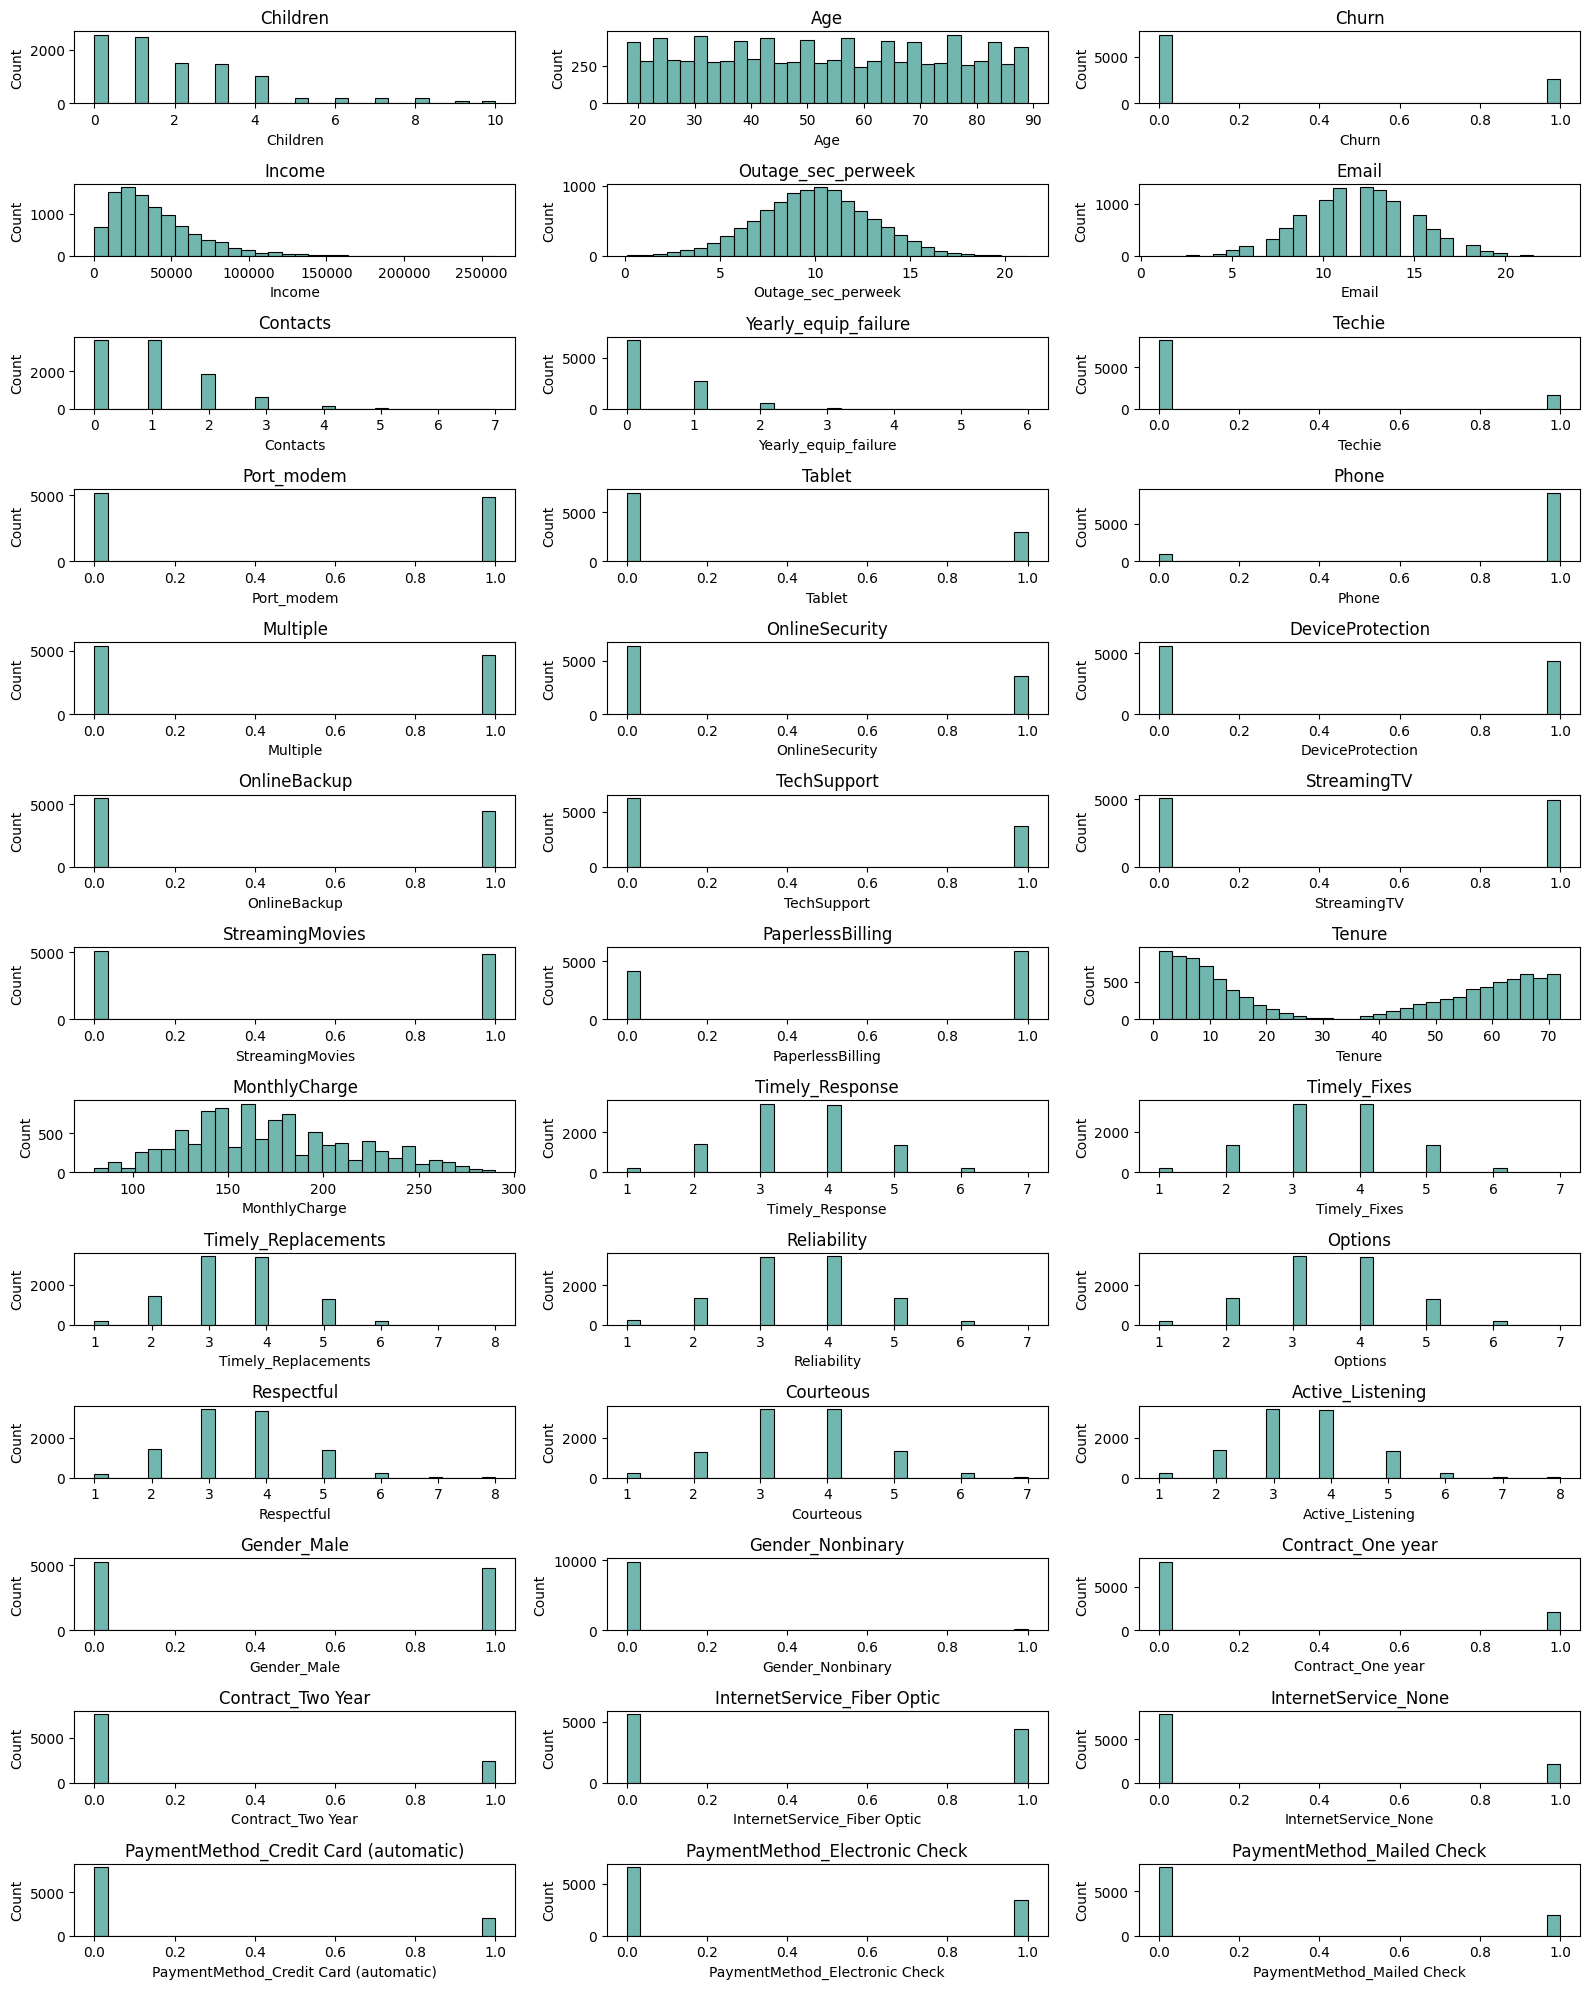

In [11]:
import plotnine as p9
import seaborn as sns
import matplotlib.pyplot as plt

# UNIVARIATE Histograms Plotting
print("Univariate Histograms\n")

variables = vars
fig, axs = plt.subplots(nrows=13, ncols=3, figsize=(16,20))
for ax, var in zip(axs.flatten(), variables):
    sns.histplot(data=df, x=var, bins=30, color='#429e94', ax=ax)
    ax.set_title(var)
    ax.set_xlabel(var)
    ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

Bivariate Visualizations



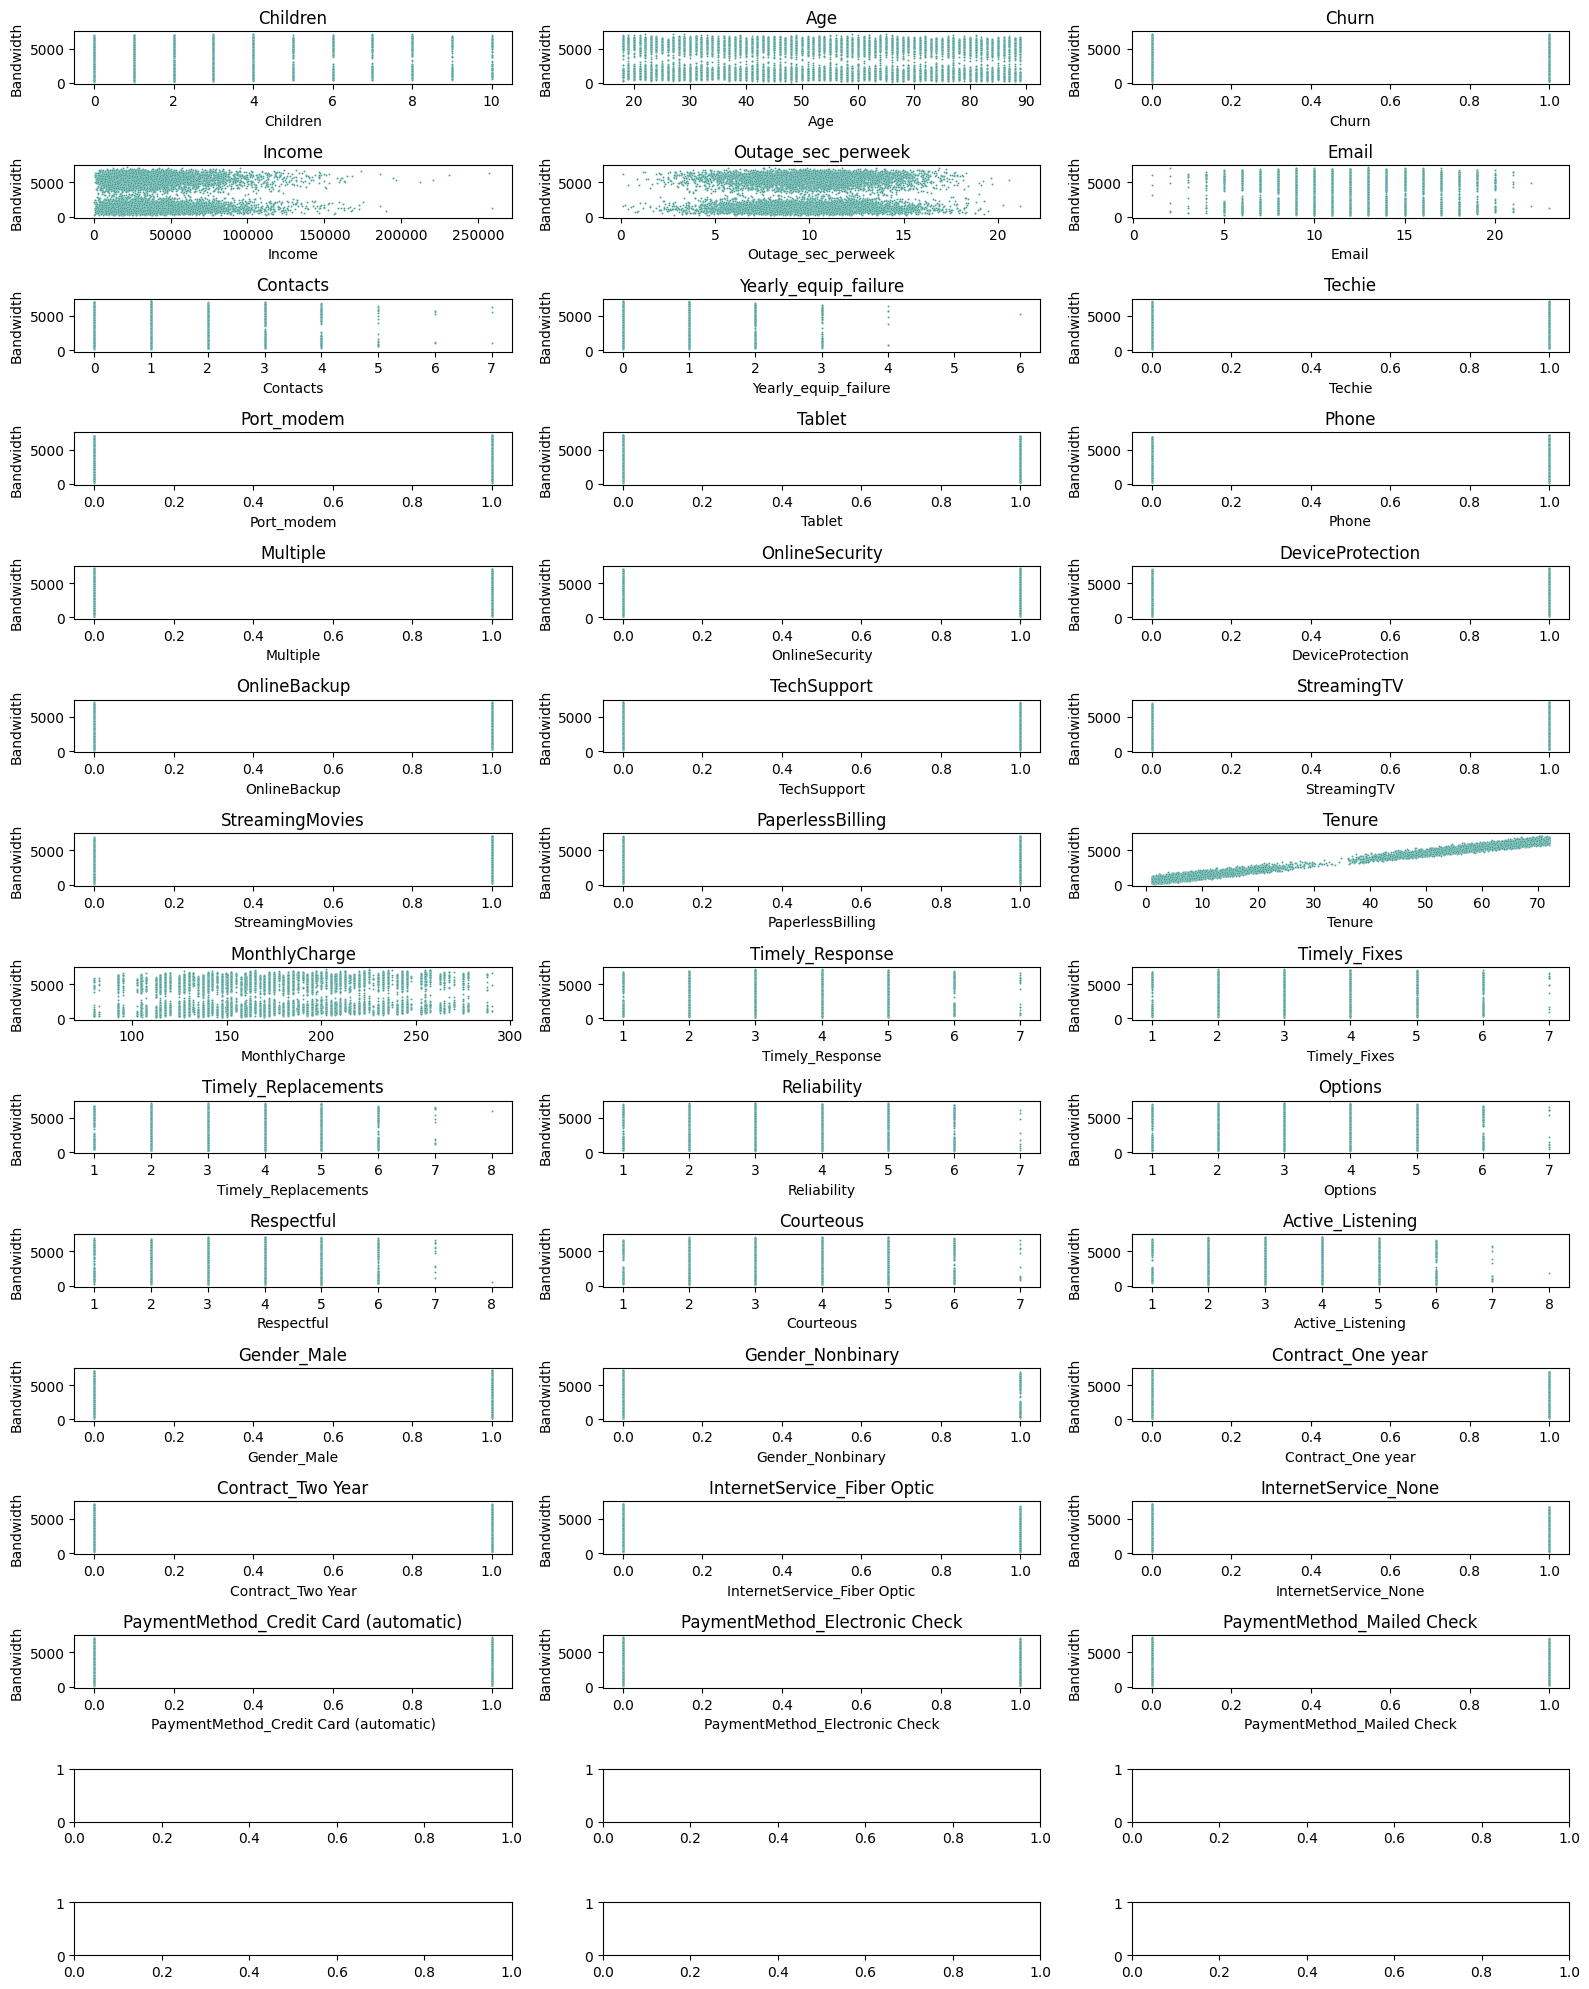

In [12]:
import plotnine as p9
import seaborn as sns
import matplotlib.pyplot as plt

# BIVARIATE Histograms
print("Bivariate Visualizations\n")
variables = vars
fig, axs = plt.subplots(nrows=15, ncols=3, figsize=(16,20))
for ax, var in zip(axs.flatten(), variables):
    sns.scatterplot(data=df, x=var, y='Bandwidth_GB_Year', s=2, color='#429e94', ax=ax)
    ax.set_title(var)
    ax.set_xlabel(var)
    ax.set_ylabel('Bandwidth')
plt.tight_layout()
plt.show()


### C4. Data Transformation Goals and Transformation Steps Taken
The author focused his attention around the bandwidth attribute (Bandwidth_GB_Year) as the dependent variable (it is the continuous target variable) to explore and analyze which factors (from the independent variables) showed a correlation with the bandwidth. 

**Data was transformed using the following steps.** First, it needed to be cleaned in preparation for the training and testing of the dataset model. To clean the data, null values were removed, "yes/no" and "true"/"false" values were converted to 1/0, respectively. This was done by replacing null values with appropriate default values for the former case. For the latter cases, the boolean strings were converted to numerical booleans using a replace on each column with said data values.

Additionally, categorical data was encoded via one-hot encoding to multiple new attributes that were boolean values. This was accomplished using the pandas pd.get_dummies(df[attribute], prefix=attribute) code from Section C1 above.

**This goal of data transformation** left us with a complete set of data that was prepared for proper analysis on the dependent variable. The author ensured that all required data for the analysis was in numerical form (for later regression analysis). Specifically, this included converting categorical data into numerical form (ie. one-hot encoding mentioned above). The author searched for missing values and depending on the nature of each data attribute, resolved these issues. Finally, the author checked for outliers (though the author determined that the nature of the outliers did not require they be removed due to the data insights they might hold).

All annotated code is illustrated in section C1, labeled according to each transformation. Due to this being a jupter notebook, the actual code will be kept in section C1.

### C5. Export Prepared Data Set as CSV File 
Below is the code written by the author to export the prepared dataframe as a CSV file.

In [13]:
# Export Prepared Data to CSV
file_name = '_data/cleaned_and_prepared_dataframe.csv'
df.to_csv(file_name, index=False)
print(f"Exported to {file_name}")

Exported to _data/cleaned_and_prepared_dataframe.csv


## Part IV: Model Comparison / Analysis

### D1: Initial Multiple Linear Regression Model (Using All Independent Variables from C2)

At this point, the author will create an initial multiple linear regression model that uses all the above independent variables except for the columns that were dropped to prevent multicollinearity as part of the one hot encoding. This was accomplished in section C1 by using the **drop_first=True** paramenter to _get_dummies()_ and basically, met the condition of setting our columns to k-1.

The author chose to use Scikit Learn due to its popularity and the fact that the author has used this framework previously. The LinearRegression model is imported, and the attributes listed immediately above are loaded as the X (independent) axis and our bandwidth (Bandwith_GB_Year) is loaded as our dependent variable.

The Ordinary Least Squares was performed as the multiple linear regression. This model was chosen due to its ability to estimate the relationship between multiple independent variables (by minimizing the sum of squares). Since scikit-learn does not directly provide the required statistics for this, the author used Statsmodels for the statistical evaluation.

In [14]:
df.dtypes

Children                                   int64
Age                                        int64
Income                                   float64
Churn                                      int64
Outage_sec_perweek                       float64
Email                                      int64
Contacts                                   int64
Yearly_equip_failure                       int64
Techie                                     int64
Port_modem                                 int64
Tablet                                     int64
Phone                                      int64
Multiple                                   int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
Tenure              

In [15]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# independent variables from above and the target variable (bandwidth used by the customer)
X = df[ind_vars]
y = df['Bandwidth_GB_Year']

# Linear Regression model
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:      Bandwidth_GB_Year   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          1.359e+05
Date:                Fri, 09 Jun 2023   Prob (F-statistic):                        0.00
Time:                        00:45:43   Log-Likelihood:                         -67136.
No. Observations:               10000   AIC:                                  1.343e+05
Df Residuals:                    9970   BIC:                                  1.345e+05
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

### D2: Statistically Based Model Reduction with Justification 
The author began by creating a duplicated dataframe (df_reduced) to use as a dataframe to iteratively filter out various attributes based on statistically based justifications.


In [16]:
# Creation of the reduced df
df_reduced = pd.DataFrame()
reduced_vars = df.columns.tolist()

The first task was to check for Multicollinearity. VIF quantifies how much the variance of the coefficient is impacted from multicollinearity. When several attributes in the model are correlated with each other, this can often introduce inflated errors, and more unreliable results. This dataframe reduction was accomplished by calculating and using the VIF and dropping all attributes with a VIF value higher than 10. This is a standard value when factoring out multicollinearity in a dataframe.

To interpret the VIF, a value of 1 means there is no correlation (and no multicollinearity). In general, a VIF value larger than 5 or 10 is an indicator of multicollinearity, and should not be included. To find the VIF, the author used statsmodels and variance_inflation_factor. The value of 5 for the VIF cutoff was recommended by Jim Frost, of Statistics by Jim (source 3).

#### Multicollinearity Detection Using VIF

In [17]:
# MULTICOLLINEARITY DETECTION VIA VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
MAX_VIF = 5

X = df[variables].copy()
vif_data = pd.DataFrame()

for i in range(len(X.columns)):
    vif = variance_inflation_factor(X.values, i)
    # Conditionally add to reduced DataFrame only if VIF is less than 10 
    if vif < 10:
        df_reduced.loc[:, X.columns[i]] = X.loc[:, X.columns[i]]
        print(f"VIF = {vif:4f} for {X.columns[i]}\t(Keeping)")  
    else:
        print(f"VIF = {vif:4f} for {X.columns[i]}\t(Dropping: Over {MAX_VIF})")

VIF = 1.943309 for Children	(Keeping)
VIF = 7.419598 for Age	(Keeping)
VIF = 2.671424 for Churn	(Keeping)
VIF = 2.978833 for Income	(Keeping)
VIF = 11.695667 for Outage_sec_perweek	(Dropping: Over 5)
VIF = 15.673962 for Email	(Dropping: Over 5)
VIF = 2.010821 for Contacts	(Keeping)
VIF = 1.393333 for Yearly_equip_failure	(Keeping)
VIF = 1.212860 for Techie	(Keeping)
VIF = 1.932576 for Port_modem	(Keeping)
VIF = 1.431486 for Tablet	(Keeping)
VIF = 10.278844 for Phone	(Dropping: Over 5)
VIF = 6.009486 for Multiple	(Keeping)
VIF = 1.596081 for OnlineSecurity	(Keeping)
VIF = 2.414856 for DeviceProtection	(Keeping)
VIF = 3.806695 for OnlineBackup	(Keeping)
VIF = 2.132447 for TechSupport	(Keeping)
VIF = 9.275045 for StreamingTV	(Keeping)
VIF = 12.891114 for StreamingMovies	(Dropping: Over 5)
VIF = 2.424736 for PaperlessBilling	(Keeping)
VIF = 3.930832 for Tenure	(Keeping)
VIF = 255.364136 for MonthlyCharge	(Dropping: Over 5)
VIF = 27.315333 for Timely_Response	(Dropping: Over 5)
VIF = 24.151

In [18]:
# Updated Reduced Dataframe Attributes Remaining
df_reduced.dtypes

Children                                   int64
Age                                        int64
Churn                                      int64
Income                                   float64
Contacts                                   int64
Yearly_equip_failure                       int64
Techie                                     int64
Port_modem                                 int64
Tablet                                     int64
Multiple                                   int64
OnlineSecurity                             int64
DeviceProtection                           int64
OnlineBackup                               int64
TechSupport                                int64
StreamingTV                                int64
PaperlessBilling                           int64
Tenure                                   float64
Gender_Male                                int64
Gender_Nonbinary                           int64
Contract_One year                          int64
Contract_Two Year   

#### Recursive Feature Elimination

The author next ran a recursive feature elimination on the remaining attributes to iteratively remove the worst performing attributes for each iteration. This is a standard part of the SciKit-Learn framework, hence the import of RFE. The author set upon 15 values as our final attribute count, and if needed, run it again with fewer. It was determined that 15 was a good value that prevented overfitting while at the same time didn't lose significant accuracy in the model. 

In [25]:
## RECURSIVE FEATURE ELIMINATION

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
MAX_ATTRIBUTES = 15

X = df_reduced
y = df['Bandwidth_GB_Year']

model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=MAX_ATTRIBUTES)
rfe = rfe.fit(df_reduced, y)

# get the names of the remaining columns
iteration2_features = df_reduced.columns[rfe.support_]

# Save reduced dataframe print the features
df_reduced = df_reduced[iteration2_features]
print('Selected features:', iteration2_features)
df_reduced.dtypes

Selected features: Index(['Children', 'Churn', 'Techie', 'Multiple', 'OnlineSecurity',
       'DeviceProtection', 'OnlineBackup', 'StreamingTV', 'Tenure',
       'Gender_Male', 'Gender_Nonbinary', 'Contract_One year',
       'Contract_Two Year', 'InternetService_Fiber Optic',
       'InternetService_None'],
      dtype='object')


Children                         int64
Churn                            int64
Techie                           int64
Multiple                         int64
OnlineSecurity                   int64
DeviceProtection                 int64
OnlineBackup                     int64
StreamingTV                      int64
Tenure                         float64
Gender_Male                      int64
Gender_Nonbinary                 int64
Contract_One year                int64
Contract_Two Year                int64
InternetService_Fiber Optic      int64
InternetService_None             int64
dtype: object

### D3: Reduced Linear Regression Model
Based on the analysis in D2, the author has reduced the model, taking into consideration multicollinearity and RFE to find a reduced model without lowering the accuracy.

Below is the creation of the reduced linear model with these attributes.


In [26]:
# Reduced linear regression model (from previous code section)
df_reduced = sm.add_constant(df_reduced)
model = sm.OLS(df['Bandwidth_GB_Year'], df_reduced)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.187e+05
Date:                Fri, 09 Jun 2023   Prob (F-statistic):               0.00
Time:                        00:58:26   Log-Likelihood:                -62095.
No. Observations:               10000   AIC:                         1.242e+05
Df Residuals:                    9984   BIC:                         1.243e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

As we can see in the above OLS Regression Results, the R-squared is 0.998. So while we have eliminated almost all of the previous attributes, we have retained the correlation almost exactly, showing the strong correlation of the bandwidth used.

In [27]:
model = sm.OLS(df['Bandwidth_GB_Year'], df_reduced)

results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.187e+05
Date:                Fri, 09 Jun 2023   Prob (F-statistic):               0.00
Time:                        00:58:37   Log-Likelihood:                -62095.
No. Observations:               10000   AIC:                         1.242e+05
Df Residuals:                    9984   BIC:                         1.243e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

### E1: Data Analysis
The author's initial multiple linear regression model, given above, included a large number of predictors from the initial dataset. The author began with this model with the goal of understanding the inter-relationship between the various attributes which had a potential to drive the dependent attribute, Bandwidth_GB_Year. By using this large a number of attributes, though, increases the likelihood of overfitting the data and not being able to be a proper predictor with future data, thus making it a poor model.

To remedy this, the author reduced negatively correlated attributes and only included positively correlated ones. This reduced dataset would reduce the complexity of our model and, thus, reduce the chance of overfitting. The author accomplished this by comparing coefficients from the regression model, p-values, and correlation values. Promising candidates for attribute removal were low coefficients, high p-values, and low/negative correlation values.

This reduced model became simpler and more likely to fit unknown data. As a final check, the R-squared value of the original- and reduced-model were compared and found to be statistically similar while reducing the model size. In both linear regression models, the R-squared models were 0.999 or higher (illustrating a higher probability of more variability in the data).

### E2: Output of all calculations
Below is the data summary from both the full dataset model and the reduced dataset model. Below is a residual plot of the reduced linear regression model followed by the residual standard error:

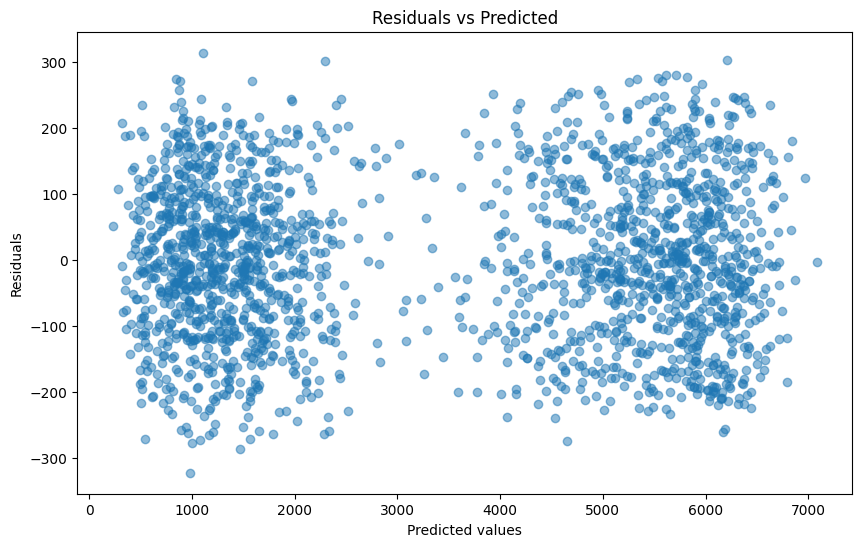

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X = df_reduced
y = df['Bandwidth_GB_Year']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting values
y_pred = model.predict(X_test)

# Compute residuals
residuals = y_test - y_pred

# Plotting the residuals
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()


The scatter plot calculated above has an even and random distribution of points that are centered at the 0 residuals mark on the Y-axis. This is an indicator of a linear relationship connecting the independent and the dependent variables.

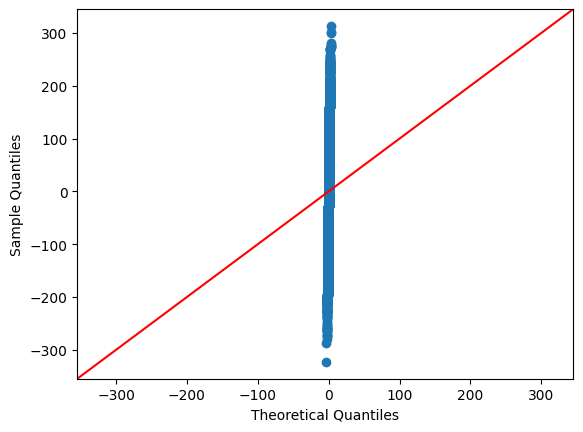

In [29]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(residuals, line='45')
plt.show()


In [30]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rse = np.sqrt(mse)
error_percentage = rse / df['Bandwidth_GB_Year'].mean() *  100

print(f"Residual Standard Error: {rse}")
print(f"Percent Error: {error_percentage:.2f}%")

Residual Standard Error: 121.30425449223196
Percent Error: 3.58%


### E3: Working code for linear regression models using a Python
The author has included the error-free, working code in the entire section E1 and E2 as seen above.


## Part V: Data Summary Along With Implications

### F1: Findings Summary of Data Analysis
Upon analysis of the data, the author found that Tenure is the most significantly correlated attribute with the amount of bandwidth used.

**A regression equation for the reduced model** would follow the format: Y = b0 + b1X1 + b2X2 + ... + bn*Xn + e. For the specific reduced model calculated by the author, the values to substitute in would be b1 (StreamingTv) = 201. While there were three other attributes, the author is not including them as part of the equation due to their respective insignificance in the calculation. Our constant from our OLS analysis (intercept) was 425. This would result in our Linear Regression equation as follows: 

Bandwidth_GB_Year = 425 + 201*Tenure

As the author **interprets the coefficients of the reduced model**, is that the StreamingTV coefficient of 201 shows there is a large impact on bandwidth from streaming television services (which does make sense). Additionally, there is a correlation between Tenure and bandwidth as well, with Tenure having coefficient of 82, but a much lower standard error.

The **statistical and practical significance of the reduced model** was shown to be a large reduction of the model size (and reduction in likelihood of overfitting) while the practical element shows that the linear regression equation could be drastically reduced to few variables.

Still, **the limitations of the data analysis** is seen in that the relationship must be a linear one. Thus, a more complicated relationship may not be able to be captured and modeled as accurately.

### F2: Recommended Course of Action Based on Analysis
The author recommends that the stakeholders work with marketers in creating a program among customers focused on bandwidth because of the positive correlation with tenure. An initial course of action could be to add a tiered program for long-term customers. For example, offering a higher-priced plan that offers higher internet speeds or higher bandwidth.


## Part VI: Demonstration
### G: Panopto Presentation
https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=c4c0fd95-744f-46e6-b127-b01c004c0ad3

### H: Web Sources

1. "Getting Started with D208" Part I, Dr. Keiona Middleton. Webinar video.

2. "Pandas get_dummies (One-Hot Encoding) Explained". https://datagy.io/pandas-get-dummies/

3. "Variance Inflation Factors (VIFs)". Frost, Jim. https://statisticsbyjim.com/regression/variance-inflation-factors/
  

### I: In-text citations and references

4. Verbiest, Nele. "Introduction to Predictive Analytics in Python". Datacamp Interactive Course (Course textbook)
